In [36]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']


In [3]:
dataset = pd.read_csv("8-dataset.csv", names=names)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print(X.head())

   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [22]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
dataset.shape

(150, 5)

In [24]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
print(dataset.isna().sum())

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64


In [27]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
n = len(dataset[dataset['Class'] == 'Iris-virginica'])
print("No of Iris-virginica in Dataset:",n)


No of Iris-virginica in Dataset: 50


In [33]:
m = len(dataset[dataset['Class'] == 'Iris-setosa'])
print("No of Iris-setosa in Dataset:",m)

No of Iris-setosa in Dataset: 50


In [34]:
m = len(dataset[dataset['Class'] == 'Versicolor'])
print("No of Versicolor in Dataset:",m)

No of Versicolor in Dataset: 0


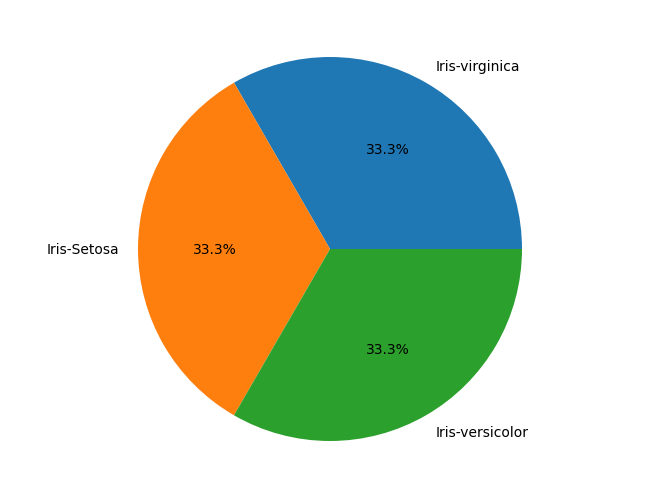

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-virginica', 'Iris-Setosa', 'Iris-versicolor']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.1f%%')
plt.show()

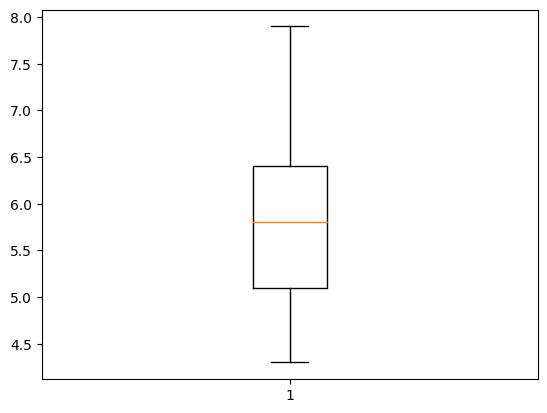

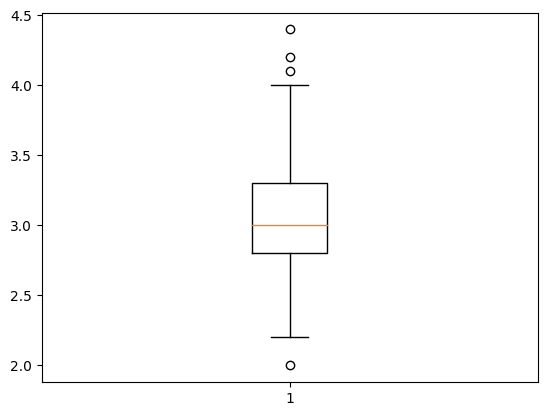

In [44]:
plt.figure(1)
plt.boxplot([dataset['sepal-length']])
plt.figure(2)
plt.boxplot([dataset['sepal-width']])
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

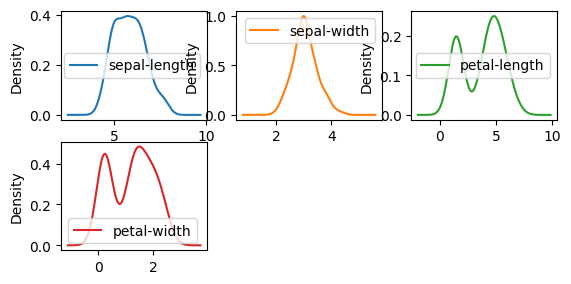

In [45]:
dataset.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)


In [19]:
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)


In [20]:
ypred = classifier.predict(Xtest)


In [46]:
i = 0
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1


Original Label            Predicted Label           Correct/Wrong            
Iris-setosa               Iris-setosa               Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-virginica            Iris-versicolor           Wrong                    
Iris-virginica            Iris-virginica            Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-setosa               Iris-setosa               Correct     

In [47]:
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))



Confusion Matrix:
 [[28  0  0]
 [ 0 22  1]
 [ 0  2 22]]


In [48]:
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred))



Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.96      0.92      0.94        24

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



In [49]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))


Accuracy of the classifer is 0.96
